Name : Chloe Evelley Thesman (Student ID Number : 1011044165)

# PRE - LECTURE HW

## Question 1

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [2]:
# Drop rows with missing values for flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


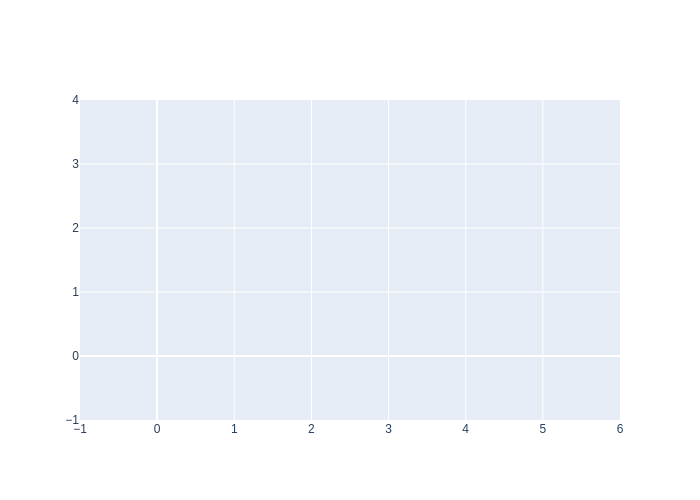

In [3]:
# Create an empty figure
fig = go.Figure()
fig.show(renderer="png")

In [4]:
# Define species
species_list = df['species'].unique()
species_list

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
for species in species_list:
    # Filter data for each species
    species_data = df[df['species'] == species]['flipper_length_mm']

    # Calculate statistics
    mean_flipper_length = species_data.mean()
    median_flipper_length = species_data.median()
    min_flipper_length = species_data.min()
    max_flipper_length = species_data.max()
    q1_flipper_length = species_data.quantile(0.25)
    q3_flipper_length = species_data.quantile(0.75)
    std_flipper_length = species_data.std()

    # Define ±2 standard deviations
    lower_2sd = mean_flipper_length - 2 * std_flipper_length
    upper_2sd = mean_flipper_length + 2 * std_flipper_length

    # Add a histogram trace for each species
    fig.add_trace(go.Histogram(x=species_data, name=f'{species}', opacity=0.75))

    # Add vertical lines for mean and median
    fig.add_vline(x=mean_flipper_length, line=dict(color='blue', dash='dash'), annotation_text=f'Mean {species}', annotation_position="top left")
    fig.add_vline(x=median_flipper_length, line=dict(color='green', dash='dash'), annotation_text=f'Median {species}', annotation_position="top right")

    # Add vertical shaded areas (rectangles) for the interquartile range and ±2 SD range
    fig.add_vrect(x0=lower_2sd, x1=upper_2sd, fillcolor='purple', opacity=0.2, line_width=0, annotation_text=f'±2 SD {species}', annotation_position="top left")
    fig.add_vrect(x0=q1_flipper_length, x1=q3_flipper_length, fillcolor='orange', opacity=0.2, line_width=0, annotation_text=f'IQR {species}', annotation_position="bottom left")

    # Add vertical lines for min and max
    fig.add_vline(x=min_flipper_length, line=dict(color='red', dash='dot'), annotation_text=f'Min {species}', annotation_position="bottom right")
    fig.add_vline(x=max_flipper_length, line=dict(color='red', dash='dot'), annotation_text=f'Max {species}', annotation_position="bottom right")

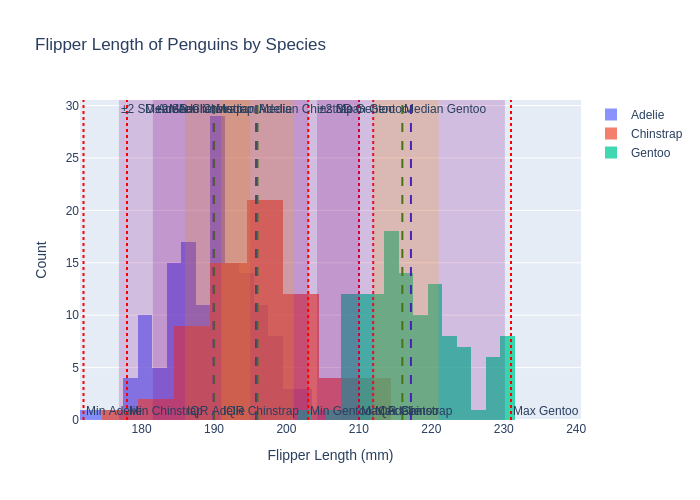

In [6]:
# Update layout
fig.update_layout(
    title='Flipper Length of Penguins by Species',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Count',
    barmode='overlay'
)

# Show the figure
fig.show(renderer="png")

## Question 2

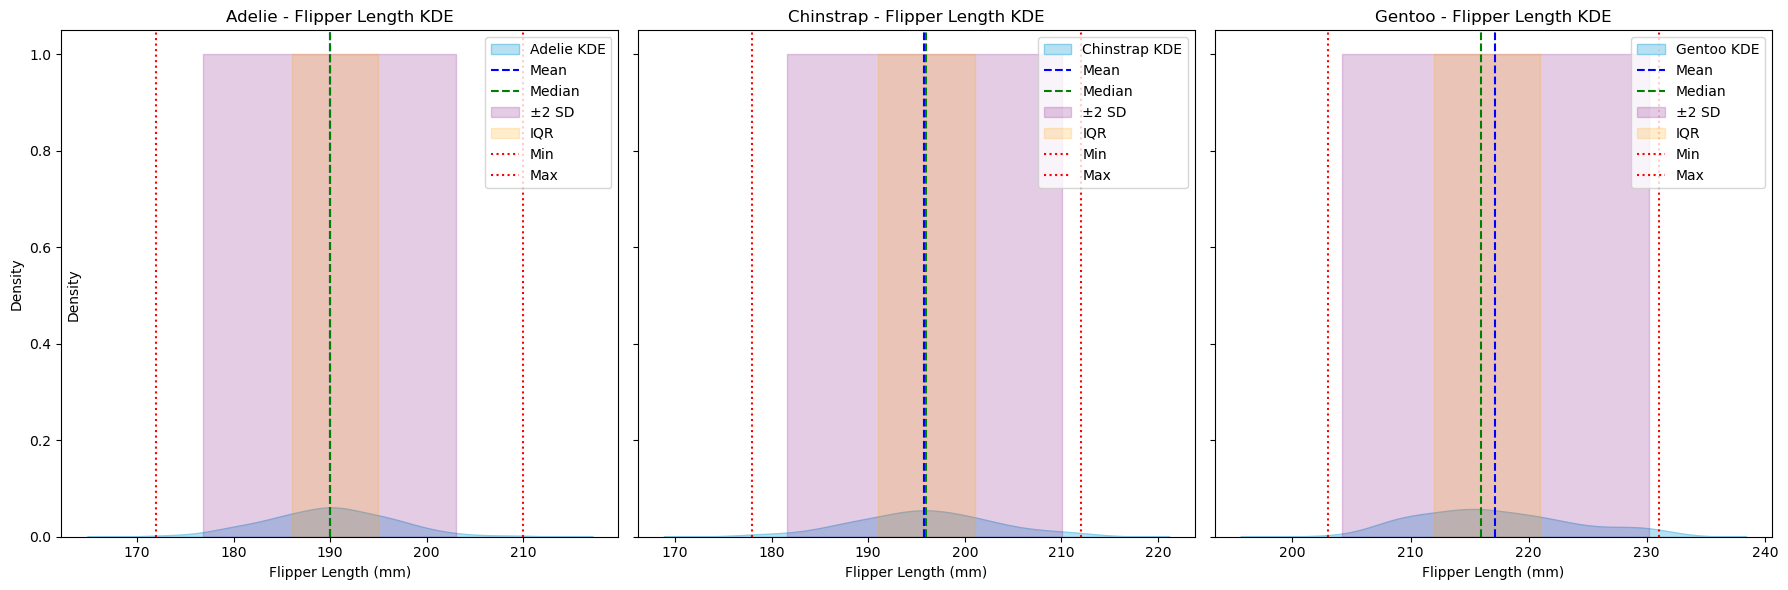

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Drop rows with missing values for flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Create subplots with 3 rows and 1 column (3 species)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define species
species_list = df['species'].unique()

for i, species in enumerate(species_list):
    # Filter data for each species
    species_data = df[df['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean_flipper_length = species_data.mean()
    median_flipper_length = species_data.median()
    min_flipper_length = species_data.min()
    max_flipper_length = species_data.max()
    q1_flipper_length = species_data.quantile(0.25)
    q3_flipper_length = species_data.quantile(0.75)
    std_flipper_length = species_data.std()

    # Define ±2 standard deviations
    lower_2sd = mean_flipper_length - 2 * std_flipper_length
    upper_2sd = mean_flipper_length + 2 * std_flipper_length

    # Plot KDE for the species
    sns.kdeplot(species_data, ax=axes[i], fill=True, color="skyblue", alpha=0.6, label=f'{species} KDE')

    # Add vertical lines for mean and median
    axes[i].axvline(mean_flipper_length, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median_flipper_length, color='green', linestyle='--', label='Median')

    # Add shaded area for ±2 SD range (in purple)
    axes[i].fill_betweenx([0, 1], lower_2sd, upper_2sd, color='purple', alpha=0.2, label='±2 SD')

    # Add shaded area for IQR (in orange)
    axes[i].fill_betweenx([0, 1], q1_flipper_length, q3_flipper_length, color='orange', alpha=0.2, label='IQR')

    # Add vertical lines for min and max (in red)
    axes[i].axvline(min_flipper_length, color='red', linestyle=':', label='Min')
    axes[i].axvline(max_flipper_length, color='red', linestyle=':', label='Max')

    # Add title and labels
    axes[i].set_title(f'{species} - Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

# Set a common y-axis label
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()
plt.show()

## Question 3

Amongst the three "data distribution" visualization methods of box plots, histograms, and kernel density estimators, I mentioned that there is a clear contrast between them like obviously the shape of the way the data is presented and also the data that it tells. A box plot tells the minimum, maximum values as well as each of the quartiles and median, where as the histogram tells the amount of data or the "density" each of the "category" and as for the KDE it tells us the probability / chance of a certain data point.

The ChatBot responded to me with "Yes, I agree with your observations on the distinctions between box plots, histograms, and kernel density estimators (KDE). Each of these visualization methods presents data in a unique way, and they offer different insights into the distribution."

These were the pros and cons that the ChatBot were able to come up with:
1. Box Plot
- Pros:
    - Concise Summary: Quickly shows key statistics such as the minimum, maximum, median, and quartiles, giving a quick sense of the distribution.
    - Outlier Detection: Helps in identifying outliers (points outside the whiskers).
    - Easy Comparison: Ideal for comparing distributions across different groups side by side.
    - No Binning: It’s not dependent on bin size, unlike histograms, and avoids the issue of determining bin width.
- Cons:
    - No Detailed Shape: It doesn’t show the actual shape of the distribution (no information on skewness or modality beyond the quartiles).
    - Limited Detail: Can oversimplify the data, hiding nuances (e.g., if data is multimodal).
    - No Density Information: It doesn’t directly show where most data points are concentrated along the range.

2. Histogram
- Pros:
    - Frequency/Density: Shows how many data points fall into different bins (ranges), giving an idea of the concentration of data in different parts of the distribution.
    - Intuitive: Easy to interpret visually, especially for understanding distribution shape (e.g., normal, skewed, or bimodal).
    - Versatile: Can be used to represent both frequency and density (with normalization).
- Cons:
    - Bin Size Sensitivity: The shape of the histogram can change significantly with different bin widths, leading to potentially misleading interpretations.
    - Less Precise for Comparisons: Comparing across multiple groups requires multiple histograms, which can become cluttered or difficult to interpret.
    - Not Smooth: Since the data is grouped into bins, the distribution can appear blocky and miss finer details.

3. Kernel Density Estimator (KDE)
- Pros:
    - Smooth Distribution: Provides a smooth estimate of the data distribution, showing the overall shape more clearly than a histogram.
    - Probability Estimate: KDE shows a probability density, giving you a sense of the likelihood of data falling within specific ranges.
    - No Binning Issues: Doesn’t depend on bin widths, avoiding the arbitrary bin-size issues found in histograms.
    - Clear Visualization of Modalities: Useful for identifying multimodal distributions (multiple peaks).
- Cons:
    - Smoothing Parameter (Bandwidth): The KDE relies on choosing an appropriate bandwidth (smoothing parameter). If it’s too large, the distribution can be oversmoothed; if it’s too small, the plot can show noise.
    - Harder to Interpret for Novices: For someone unfamiliar with probability density, KDE might be less intuitive compared to a histogram or box plot.
    - No Direct Count: Unlike histograms, KDE doesn’t show exact counts, only probabilities.



So when it comes to preference between the three data visualization methods of box plots, histograms, and kernel density estimators, I would definitely choose according to the data that I currently am trying to analyze or the data that I have. However, in general, I much prefer to use a boxplot over the others, because they give a clear, straightforward snapshot of my data. They make it easy to see the median, range, and any outliers in one glance, which helps me quickly understand the spread and identify potential issues. I find them especially useful when comparing multiple datasets side by side since everything is neatly summarized. Unlike histograms, where I have to think about how to set the bins, or KDEs, which can be tricky to fine-tune, box plots are simple and consistent. While they might not show the full shape of the data, they strike the right balance between simplicity and insight for most situations.

## Summary of Interactions

### Initial Question (Dataset and Visualization):
- You provided a dataset from the Seaborn library (penguins.csv) and asked for guidance on marking location (mean and median) and scale (range, interquartile range, and ±2 standard deviations) using Plotly histograms for each species in the dataset. The goal was to visualize these properties on histograms of flipper_length_mm.
- I guided you through the use of fig.add_hline() and fig.add_vrect() to add horizontal lines (mean and median) and vertical rectangles (marking scale ranges) in Plotly.

### Follow-up Request (KDE Plot):
- You later requested that the same task be performed using Kernel Density Estimation (KDE) plots instead of histograms, and the figures should be organized in rows of three plots (one for each species).
- I provided code using Seaborn’s kdeplot() to visualize flipper_length_mm for each species. The code included vertical lines marking the mean and median, and shaded regions representing the interquartile range (IQR) and ±2 standard deviations.

### Analysis of Visualization Methods:
- You shared images illustrating various data visualization techniques, such as box plots, histograms, and KDE, and asked for a comparison and explanation of how each visualization works.
- I provided an in-depth comparison of the three methods, highlighting their differences in terms of shape, central tendency (mean/median), and information on data spread (IQR, range, standard deviations).

### Pros and Cons Discussion:
- You asked for the pros and cons of the three distribution visualization methods—box plots, histograms, and KDEs. I provided a detailed breakdown:
    - Box Plot: Great for summarizing quartiles, outliers, and comparing groups but lacks detailed distribution shape.
    - Histogram: Shows count/density of data in intervals but is sensitive to bin size and can be blocky.
    - KDE: Provides a smooth, continuous estimate of the distribution but is sensitive to the bandwidth parameter and can be less intuitive.

### Key Insights:
- Box Plots: Best for understanding quartiles, range, and outliers, providing a quick summary of distribution. However, it doesn’t show detailed distribution shapes or modality.
- Histograms: Useful for showing frequency distributions but can be influenced by bin width, which can affect interpretability.
- KDEs: Excellent for visualizing the smooth distribution of the data and for identifying multiple modes in the data, though it may require more interpretation and depend on the choice of bandwidth.

### Technical Aspects:
- Code examples using Seaborn’s kdeplot(), axvline() for vertical markers, and fill_between() for shading distribution areas were provided, alongside Plotly histogram techniques using fig.add_hline() and fig.add_vrect().

**Link: **

## Question 4

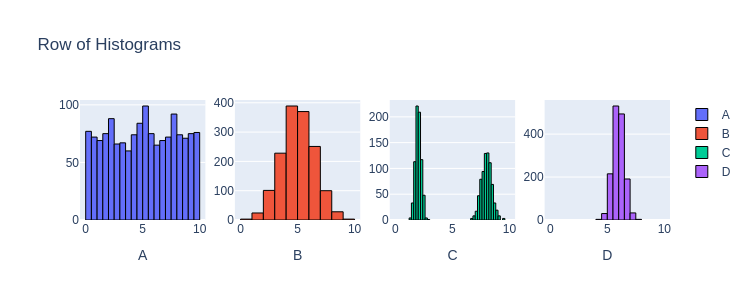

In [8]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Which datasets have similar means and similar variances = A and C
2. Which datasets have similar means but quite different variances = B and C
3. Which datasets have similar variances but quite different means = B and D
4. Which datasets have quite different means and quite different variances = A and D

# POST LECTURE HW

## Question 5

The relationship between the mean and median and "right" and "left" skewness is:
- Mean is simply the average of a dataset. You find it by adding up all the numbers and dividing by how many numbers there are.
- Median is the middle value when you line up all the numbers from smallest to largest. If there's an even number of observations, you take the average of the two middle numbers.
- Now, these two measures can behave differently, especially when we consider skewness—which describes how symmetrical or asymmetrical a dataset is.
    - In a right-skewed distribution (also known as positively skewed), the tail on the right side is longer or fatter than the left side. Here, the mean tends to be greater than the median. This happens because some unusually high values pull the average up, making it higher than the middle value.
    - On the flip side, a left-skewed distribution (negatively skewed) has a longer or fatter tail on the left. In this case, the mean usually ends up being less than the median. This occurs when low values pull the average down, dragging it below the middle point.

The causation of skewness is:
Skewness can arise from several factors, including outliers—those extreme values that stand out from the rest of the data. These outliers can distort the mean, creating a gap between it and the median.

Explanation of the code:
- Imports:
    - The stats module from SciPy is used for statistical distributions.
    - pandas is utilized for data manipulation and analysis.
    - numpy is employed for numerical operations.
    - plotly.express is presumably imported for data visualization.
- Sample Generation:
    - The variable sample1 is created by generating 1,000 random values from a gamma distribution with a shape parameter a = 2 and a scale parameter of 2. The gamma distribution is typically characterized by right skewness.
- Histogram:
    - A histogram (referred to as fig1) is created to visualize the distribution of sample1, helping to illustrate its skewness.
- Mean Calculation:
    - The mean of sample1 is computed using the mean() method.
- Median Calculation:
    - The median is determined using np.quantile(sample1, [0.5]), which returns the 50th percentile (the median).
- Sample2:
    - The variable sample2 is generated by taking the negative of the values drawn from the gamma distribution.
    - This transformation typically results in a left-skewed distribution, as the larger (previously positive) values are flipped into the negative range.

This code provides insights into the distribution characteristics of gamma-distributed random variables, enabling the calculation and comparison of central tendency measures (mean and median) for both the original and transformed samples. This is essential for understanding the skewness of the distributions being analyzed.

**Notebook Structure**

1. Import Libraries

In [9]:
# Import necessary libraries
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

2. Generate Sample 1 and Visualize It

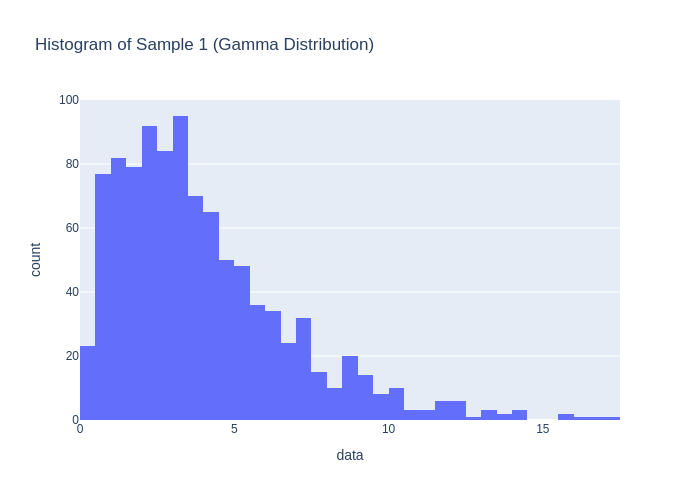

In [10]:
# Generate random samples from a gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for the first sample
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title='Histogram of Sample 1 (Gamma Distribution)')
fig1.show(renderer="png")

3. Calculate Mean and Median of Sample 1

In [11]:
# Calculate the mean of the first sample
mean_sample1 = sample1.mean()

# Calculate the median (50th percentile) of the first sample
median_sample1 = np.quantile(sample1, [0.5])

# Display results
mean_sample1, median_sample1

(3.995957686335214, array([3.3772952]))

4. Generate Sample 2 (Negatively Shifted) and Visualize It

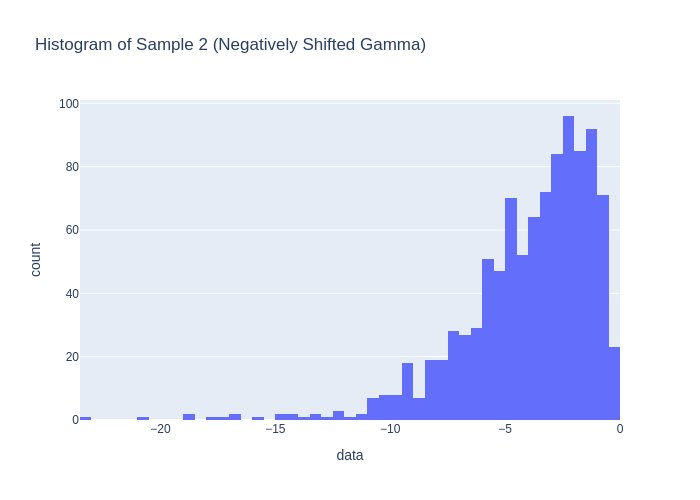

In [12]:
# Generate random samples from a negatively shifted gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for the second sample
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title='Histogram of Sample 2 (Negatively Shifted Gamma)')
fig2.show(renderer="png")

5. Calculate Mean and Median of Sample 2

In [13]:
# Calculate the mean of the second sample
mean_sample2 = sample2.mean()

# Calculate the median (50th percentile) of the second sample
median_sample2 = np.quantile(sample2, [0.5])

# Display results
mean_sample2, median_sample2

(-4.02353193974685, array([-3.34361248]))

6. Summarize Results and Discuss Skewness

In [14]:
# Summary of results
results = {
    "Sample 1": {
        "Mean": mean_sample1,
        "Median": median_sample1,
        "Skewness": "Right Skewed" if mean_sample1 > median_sample1 else "Symmetric" if mean_sample1 == median_sample1 else "Left Skewed"
    },
    "Sample 2": {
        "Mean": mean_sample2,
        "Median": median_sample2,
        "Skewness": "Right Skewed" if mean_sample2 > median_sample2 else "Symmetric" if mean_sample2 == median_sample2 else "Left Skewed"
    }
}

results

{'Sample 1': {'Mean': 3.995957686335214,
  'Median': array([3.3772952]),
  'Skewness': 'Right Skewed'},
 'Sample 2': {'Mean': -4.02353193974685,
  'Median': array([-3.34361248]),
  'Skewness': 'Left Skewed'}}

## Question 6

In [15]:
import pandas as pd

nhl_rosters = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-09/nhl_rosters.csv')
nhl_rosters

,team_code,season,position_type,player_id,headshot,first_name,last_name,sweater_number,position_code,shoots_catches,height_in_inches,weight_in_pounds,height_in_centimeters,weight_in_kilograms,birth_date,birth_city,birth_country,birth_state_province
0,ATL,19992000,forwards,8467867,https://assets.nhle.com/mugs/nhl/19992000/ATL/...,Bryan,Adams,26.0,L,L,72.0,185.0,183.0,84.0,1977-03-20,Fort St. James,CAN,British Columbia
1,ATL,19992000,forwards,8445176,https://assets.nhle.com/mugs/nhl/19992000/ATL/...,Donald,Audette,28.0,R,R,68.0,191.0,173.0,87.0,1969-09-23,Laval,CAN,Quebec
2,ATL,19992000,forwards,8460014,https://assets.nhle.com/mugs/nhl/19992000/ATL/...,Eric,Bertrand,83.0,L,L,73.0,205.0,185.0,93.0,1975-04-16,St-Ephrem,CAN,Quebec
3,ATL,19992000,forwards,8460510,https://assets.nhle.com/mugs/nhl/19992000/ATL/...,Jason,Botterill,28.0,L,L,76.0,217.0,193.0,98.0,1976-05-19,Edmonton,CAN,Alberta
4,ATL,19992000,forwards,8459596,https://assets.nhle.com/mugs/nhl/19992000/ATL/...,Andrew,Brunette,15.0,L,L,73.0,215.0,185.0,98.0,1973-08-24,Sudbury,CAN,Ontario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54878,OTT,20232024,defensemen,8474612,https://assets.nhle.com/mugs/nhl/20232024/OTT/...,Travis,Hamonic,23.0,D,R,73.0,200.0,185.0,91.0,1990-08-16,St. Malo,CAN,Manitoba
54879,OTT,20232024,defensemen,8482105,https://assets.nhle.com/mugs/nhl/20232024/OTT/...,Jake,Sanderson,85.0,D,L,74.0,203.0,188.0,92.0,2002-07-08,Whitefish,USA,Montana
54880,OTT,20232024,defensemen,8482245,https://assets.nhle.com/mugs/nhl/20232024/OTT/...,Artem,Zub,2.0,D,R,75.0,204.0,191.0,93.0,1995-10-03,Khabarovsk,RUS,NaN
54881,OTT,20232024,goalies,8476341,https://assets.nhle.com/mugs/nhl/20232024/OTT/...,Anton,Forsberg,31.0,G,L,75.0,195.0,191.0,88.0,1992-11-27,Härnösand,SWE,NaN


In [16]:
# Display the first few rows of the dataset
print(nhl_rosters.head())

  team_code    season position_type  player_id  \
0       ATL  19992000      forwards    8467867   
1       ATL  19992000      forwards    8445176   
2       ATL  19992000      forwards    8460014   
3       ATL  19992000      forwards    8460510   
4       ATL  19992000      forwards    8459596   

                                            headshot first_name  last_name  \
0  https://assets.nhle.com/mugs/nhl/19992000/ATL/...      Bryan      Adams   
1  https://assets.nhle.com/mugs/nhl/19992000/ATL/...     Donald    Audette   
2  https://assets.nhle.com/mugs/nhl/19992000/ATL/...       Eric   Bertrand   
3  https://assets.nhle.com/mugs/nhl/19992000/ATL/...      Jason  Botterill   
4  https://assets.nhle.com/mugs/nhl/19992000/ATL/...     Andrew   Brunette   

   sweater_number position_code shoots_catches  height_in_inches  \
0            26.0             L              L              72.0   
1            28.0             R              R              68.0   
2            83.0         

In [17]:
# Get basic information about the dataset
print(nhl_rosters.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54883 entries, 0 to 54882
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team_code              54883 non-null  object 
 1   season                 54883 non-null  int64  
 2   position_type          54883 non-null  object 
 3   player_id              54883 non-null  int64  
 4   headshot               54883 non-null  object 
 5   first_name             54883 non-null  object 
 6   last_name              54883 non-null  object 
 7   sweater_number         54734 non-null  float64
 8   position_code          54883 non-null  object 
 9   shoots_catches         54598 non-null  object 
 10  height_in_inches       54855 non-null  float64
 11  weight_in_pounds       54858 non-null  float64
 12  height_in_centimeters  54855 non-null  float64
 13  weight_in_kilograms    54858 non-null  float64
 14  birth_date             54883 non-null  object 
 15  bi

In [18]:
# Summary statistics for numerical columns
summary_statistics = nhl_rosters.describe()
print(summary_statistics)

             season     player_id  sweater_number  height_in_inches  \
count  5.488300e+04  5.488300e+04    54734.000000      54855.000000   
mean   1.991967e+07  8.459076e+06       24.204900         72.403263   
std    2.399347e+05  1.194829e+04       19.755238          2.303670   
min    1.917192e+07  8.444850e+06        1.000000         63.000000   
25%    1.980198e+07  8.448170e+06       10.000000         71.000000   
50%    1.996200e+07  8.456153e+06       20.000000         72.000000   
75%    2.011201e+07  8.470645e+06       31.000000         74.000000   
max    2.023202e+07  8.484314e+06       99.000000         81.000000   

       weight_in_pounds  height_in_centimeters  weight_in_kilograms  
count      54858.000000           54855.000000         54858.000000  
mean         195.425426             183.882436            88.663550  
std           18.069061               5.910945             8.209277  
min          125.000000             160.000000            57.000000  
25%       

In [19]:
# Summary for categorical columns
categorical_summary = nhl_rosters.describe(include='object')
print(categorical_summary)

       team_code position_type  \
count      54883         54883   
unique        58             3   
top          MTL      forwards   
freq        3009         33038   

                                                 headshot first_name  \
count                                               54883      54883   
unique                                              54883       1421   
top     https://assets.nhle.com/mugs/nhl/19992000/ATL/...       Mike   
freq                                                    1       1215   

       last_name position_code shoots_catches  birth_date birth_city  \
count      54883         54883          54598       54883      54883   
unique      5673             5              2        7270       2109   
top        Smith             D              L  1980-09-26    Toronto   
freq         478         16823          35973          50       2843   

       birth_country birth_state_province  
count          54883                45312  
unique            4

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

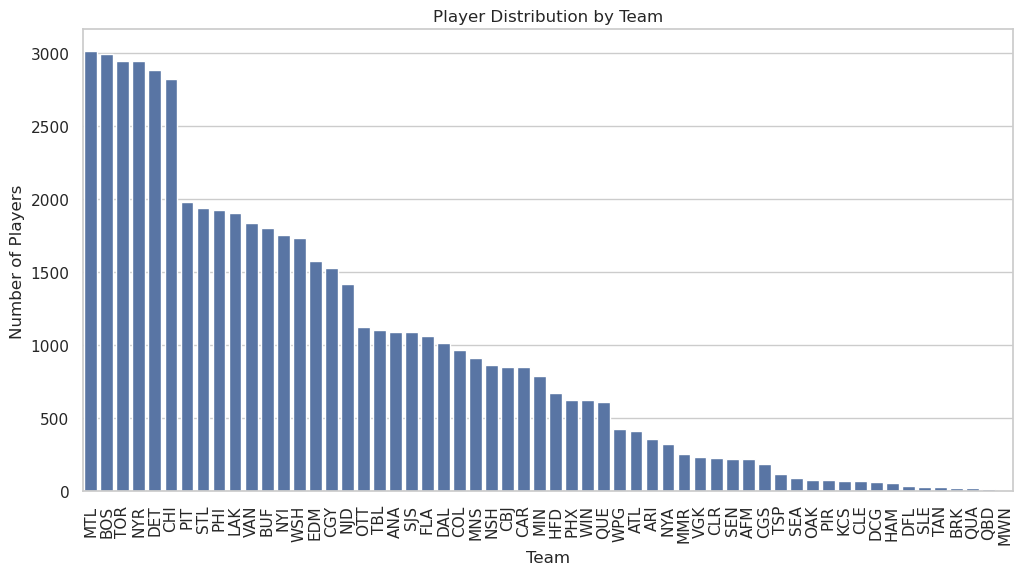

In [21]:
# 1. Player Distribution by Team
plt.figure(figsize=(12, 6))
sns.countplot(data=nhl_rosters, x='team_code', order=nhl_rosters['team_code'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Player Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.show()

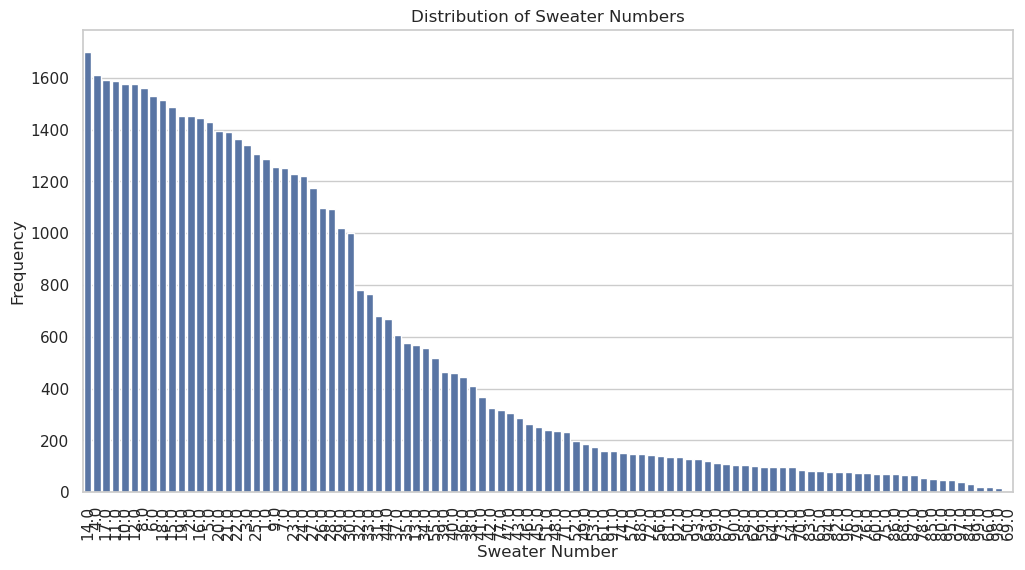

In [22]:
# 2. Sweater Number Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=nhl_rosters, x='sweater_number', order=nhl_rosters['sweater_number'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Sweater Numbers')
plt.xlabel('Sweater Number')
plt.ylabel('Frequency')
plt.show()

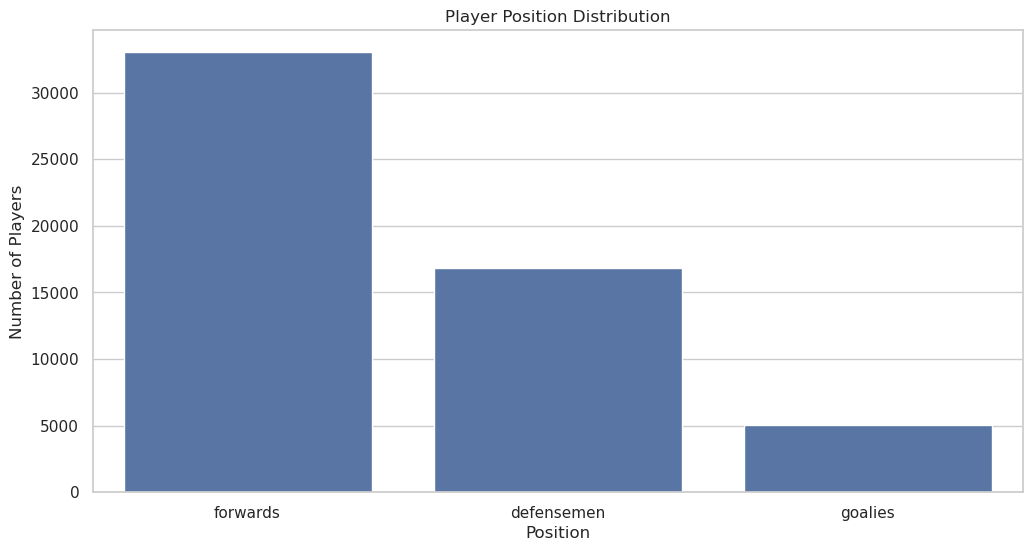

In [23]:
# 3. Position Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=nhl_rosters, x='position_type', order=nhl_rosters['position_type'].value_counts().index)
plt.xticks(rotation=0)
plt.title('Player Position Distribution')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()

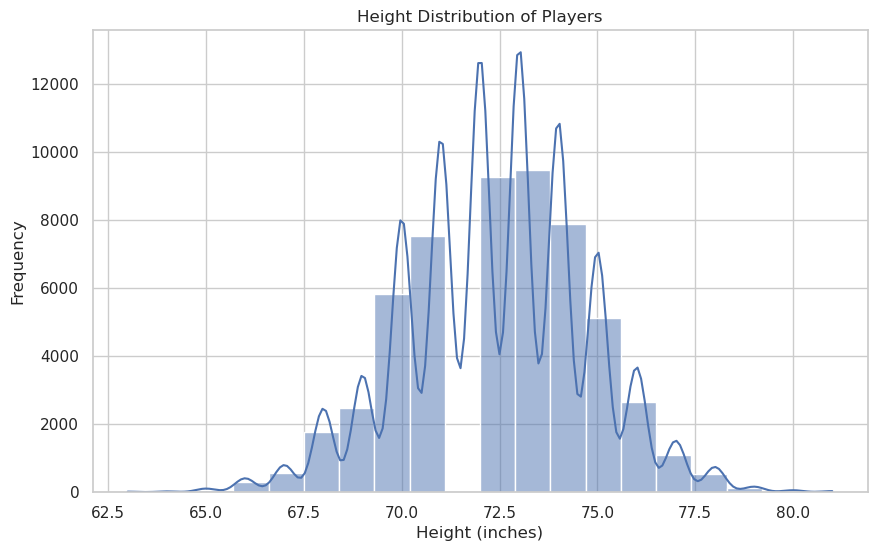

In [24]:
# 4. Height Distribution of Players
plt.figure(figsize=(10, 6))
sns.histplot(nhl_rosters['height_in_inches'], bins=20, kde=True)
plt.title('Height Distribution of Players')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

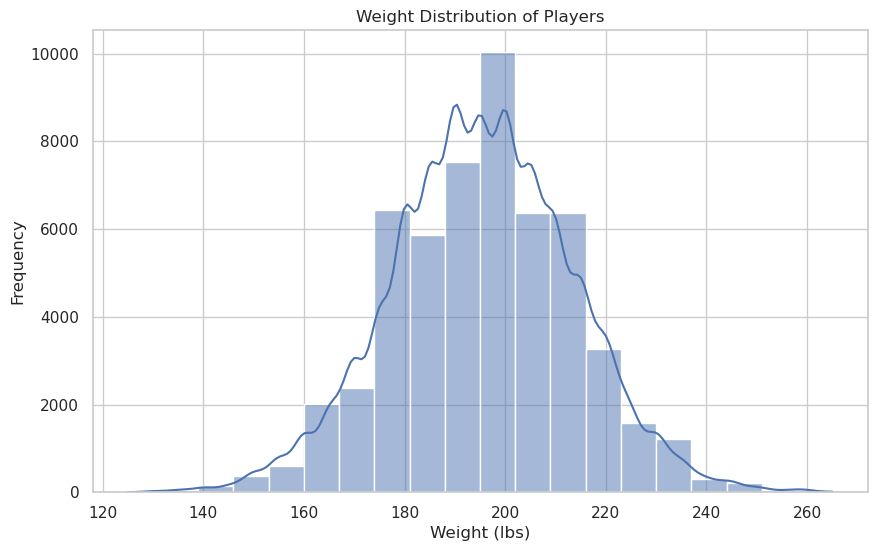

In [25]:
# 5. Weight Distribution of Players
plt.figure(figsize=(10, 6))
sns.histplot(nhl_rosters['weight_in_pounds'], bins=20, kde=True)
plt.title('Weight Distribution of Players')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

## Question 7

In [26]:
pip install plotly pandas

Note: you may need to restart the kernel to use updated packages.


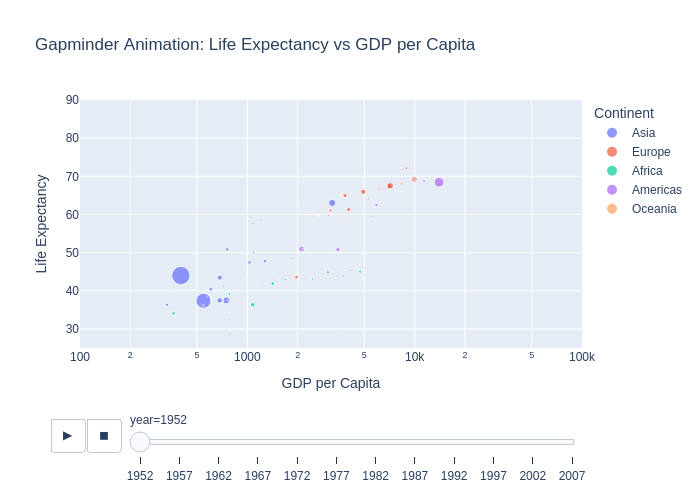

In [27]:
import plotly.express as px
import pandas as pd

# Load the Gapminder dataset
df = px.data.gapminder()

# Create the animated scatter plot
fig = px.scatter(
    df,
    x="gdpPercap",                   # GDP per capita on x-axis
    y="lifeExp",                     # Life expectancy on y-axis
    animation_frame="year",          # Animation frames based on year
    animation_group="country",       # Group by country for animation
    size="pop",                      # Size of points based on population
    color="continent",               # Color by continent
    hover_name="country",            # Hover text showing country name
    log_x=True,                     # Log scale for x-axis
    range_x=[100, 100000],          # Range for x-axis
    range_y=[25, 90],               # Range for y-axis
    title="Gapminder Animation: Life Expectancy vs GDP per Capita",
)

# Update layout
fig.update_layout(
    xaxis_title="GDP per Capita",
    yaxis_title="Life Expectancy",
    legend_title="Continent",
)

# Show the figure using PNG renderer for submissions
fig.show(renderer="png")

## Question 8

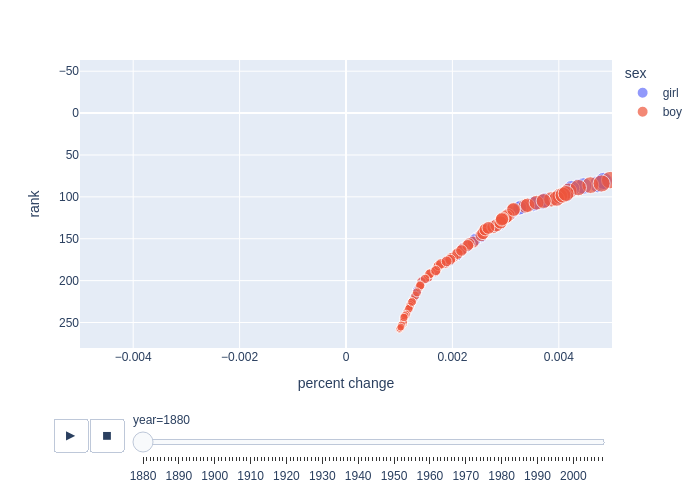

In [28]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']  

# Create rank within each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort the values for further processing
bn = bn.sort_values(['name', 'year'])

# Create percent change from the previous year
bn['percent change'] = bn['percent'].diff()

# Identify new names for which to calculate the percentage change
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent'] 

# Sort the DataFrame by year
bn = bn.sort_values('year')

# Filter to keep only "common" names with percent > 0.001
bn = bn[bn.percent > 0.001]  

# Create the scatter plot with the specified parameters
fig = px.scatter(
    bn, 
    x="percent change",          # Set x to "percent change"
    y="rank",                    # Set y to "rank"
    animation_frame="year",      # Set animation frame to "year"
    animation_group="name",      # Set animation group and hover name to "name"
    size="percent",              # Set size to "percent"
    color="sex",                 # Set color to "sex"
    size_max=50,                # Set maximum size for points
    range_x=[-0.005, 0.005]     # Set range for x-axis
)

# Update y-axis to reverse the rank (1 on top)
fig.update_yaxes(autorange='reversed') 

# Show the figure using PNG renderer for submissions
fig.show(renderer="png")

## Question 9 

Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Answer: Somewhat